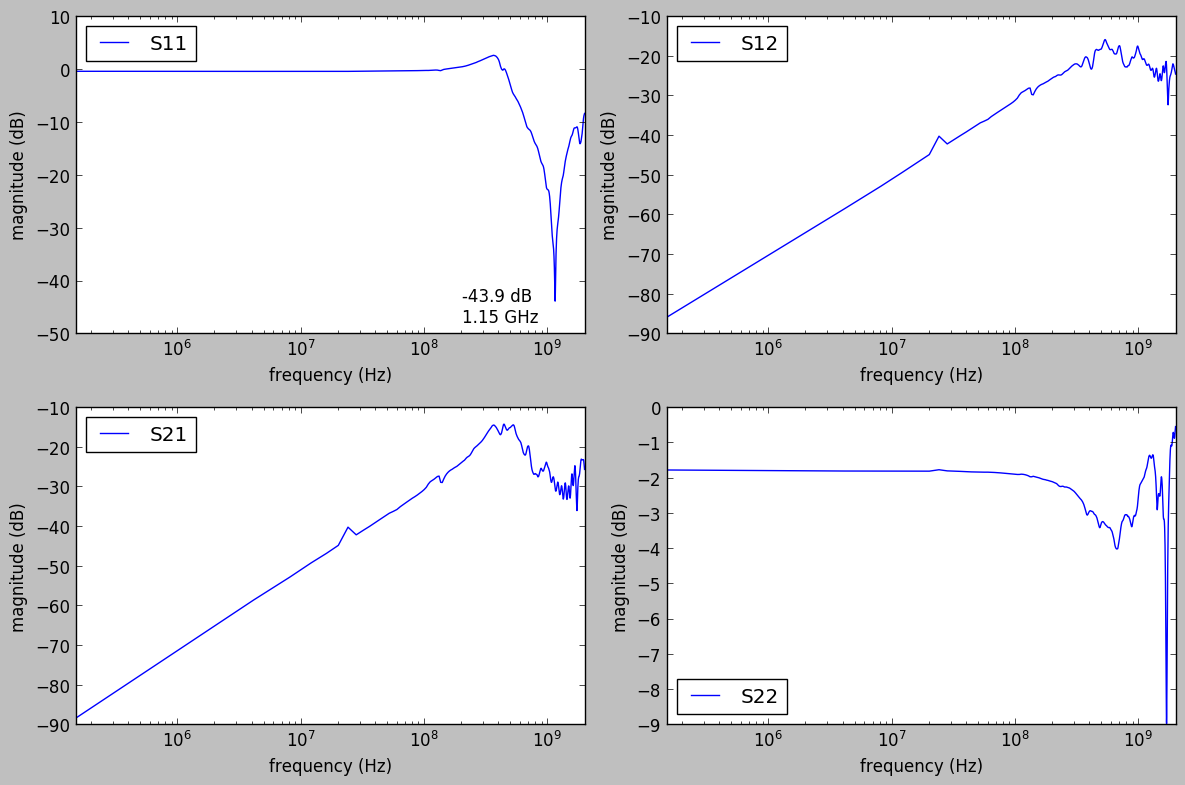

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import os
import collections
import matplotlib as mp
mp.style.use('classic')

#mp.rcParams.update({'font.size': 14})

# Read simulation files
def datafileread(measurename,skipfirstrows):
    # Reading Datafiles
    path = measurename
    data = np.genfromtxt(path,
                        skip_header=skipfirstrows,
                        delimiter='\t',
                        dtype=(float,float),
                        unpack=True)
    return data

# measurement
name = 'cz_rf.csv'
freq,s11,s12,s21,s22,nope = datafileread(name,3)

# Min S11
imin_s11 = np.argmin(s11)
coords_s11 = (freq[imin_s11] - 9.5e8, np.amin(s11))
coords_s11f = (freq[imin_s11] - 9.5e8, np.amin(s11) - 4)
s = "%s dB" % round(np.amin(s11),1)
s2 = "%s GHz" % round(freq[imin_s11]*1e-9,2)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(12,8))
#
ax1.plot(freq,s11, label="S11")
#ax1.set_title('S11')
ax1.set_xlabel('frequency (Hz)')
ax1.annotate(s=s, xy=coords_s11)
ax1.annotate(s=s2, xy=coords_s11f)
ax1.set_xscale('log')
ax1.set_xlim(left=freq[0],right=freq[-1])
ax1.set_ylabel('magnitude (dB)')
ax1.legend(loc='best')
#
ax2.plot(freq, s12, label="S12")
#ax2.set_title('S12')
ax2.set_xscale('log')
ax2.set_xlim(left=freq[0],right=freq[-1])
ax2.set_xlabel('frequency (Hz)')
ax2.set_ylabel('magnitude (dB)')
ax2.legend(loc='best')
#
ax3.plot(freq, s21, label="S21")
ax3.set_xlim(left=freq[0],right=freq[-1])
ax3.set_xscale('log')
#ax3.set_title('S12')
ax3.set_xlabel('frequency (Hz)')
ax3.set_ylabel('magnitude (dB)')
ax3.legend(loc='best')
#
ax4.plot(freq, s22, label="S22")
ax4.set_xscale('log')
ax4.set_xlim(left=freq[0],right=freq[-1])
#ax4.set_title('S22')
ax4.set_xlabel('frequency (Hz)')
ax4.set_ylabel('magnitude (dB)')
ax4.legend(loc='lower left')
#
plt.tight_layout()
plt.savefig("../../src/3/figures/sensor_freq_response.png", pad_inches=0.3)
plt.show()

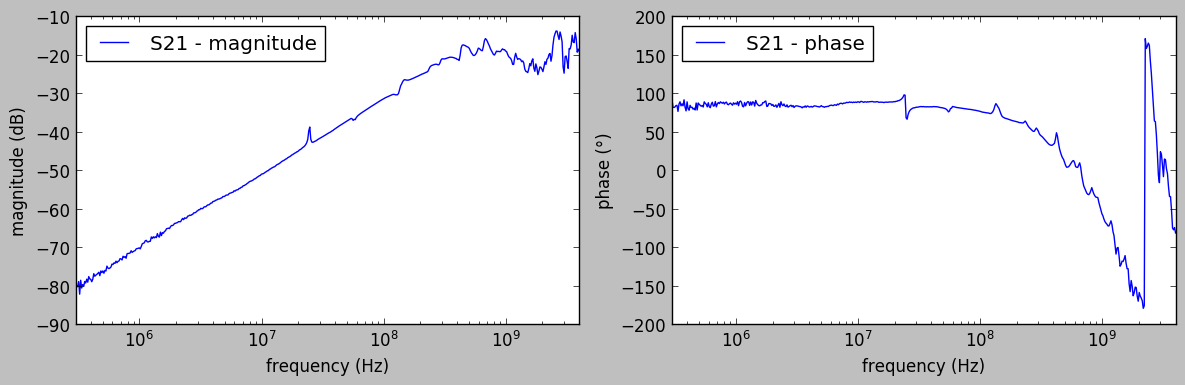

In [10]:
# measurement
name = 's21.csv'
freq,s21m,s21p,nope = datafileread(name,3)

f, (ax1, ax2), = plt.subplots(1,2,figsize=(12,4))
#
ax1.plot(freq,s21m, label="S21 - magnitude")
#ax1.set_title('S21 - magnitude (dB)')
ax1.set_xlabel('frequency (Hz)')
ax1.set_xscale('log')
ax1.set_xlim(left=freq[0],right=freq[-1])
ax1.set_ylabel('magnitude (dB)')
ax1.legend(loc='best')
#
ax2.plot(freq, s21p, label="S21 - phase")
#ax2.set_title('S21 - phase (deg)')
ax2.set_xscale('log')
ax2.set_xlim(left=freq[0],right=freq[-1])
ax2.set_xlabel('frequency (Hz)')
ax2.set_ylabel('phase (°)')
ax2.legend(loc='best')

plt.tight_layout()
plt.savefig("../../src/3/figures/s21_freq_response.png", pad_inches=0.3)
plt.show()